In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import json, csv
plt.style.use('bmh')

# Necessary modules

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import module and function for CPC data extraction
from Module_CPC import *

# import functions for FTIR extraction and analysis
from Module_FTIR import All_Absorbance_Analysis, ShoowAllCorrectedAbsorbances

# For Image Analysis
from RGB_Collection_area import GetDiameterFromImage

# For final computation for aeral densities 
from Module_Computations import Particles2Absorbances

# Initial Elements

In [4]:
# Get the base folder for the compound
data_path = os.path.join("Data", "SubericAcid")
if not os.path.exists(data_path) or not os.path.isdir(data_path):
    raise NotADirectoryError(f"Data path is not a valid directory: {data_path}")

#Folder for the CPC files 
CPC_folder_path = os.path.join(data_path, "CPCData")
if not os.path.exists(CPC_folder_path) or not os.path.isdir(CPC_folder_path):
    raise NotADirectoryError(f"CPCData folder is not a valid directory: {CPC_folder_path}")

# Folder for the FTIR files
FTIR_folder_path = os.path.join(data_path, "FTIRData")
if not os.path.exists(FTIR_folder_path) or not os.path.isdir(FTIR_folder_path):
    raise NotADirectoryError(f"FTIRData folder is not a valid directory: {FTIR_folder_path}")

# Folder for the FTIR files
Pictures_folder_path = os.path.join(data_path, "Pictures")
if not os.path.exists(FTIR_folder_path) or not os.path.isdir(FTIR_folder_path):
    raise NotADirectoryError(f"FTIRData folder is not a valid directory: {FTIR_folder_path}")

# Folder for the outputs
output_folder = os.path.join(data_path, "OUTPUT")
if not os.path.exists(output_folder) or not os.path.isdir(output_folder):
    os.mkdir(output_folder)

# Excel File regrouping all informations on experiences

In [5]:
excel_filename = "SubericAcidSamples.xlsx"
exp_excel_path = os.path.join(data_path, excel_filename)
if not os.path.exists(exp_excel_path) or not os.path.isfile(exp_excel_path):
    raise FileNotFoundError(f"Samples file does not exist: {exp_excel_path}")

In [6]:
exp_excel = pd.read_excel(exp_excel_path)
exp_excel

Sample Material  dia      M    rho         Q  aperture  \
0        1     ZnSe  400  174.2  1.272  5.944293      0.25   
1        1     ZnSe  400  174.2  1.272  5.944293      0.50   
2        1     ZnSe  400  174.2  1.272  5.944293      1.00   
3        1     ZnSe  400  174.2  1.272  5.944293      1.50   
4        1     ZnSe  400  174.2  1.272  5.944293      2.00   
..     ...      ...  ...    ...    ...       ...       ...   
67       6     ZnSe  400  174.2  1.272  5.944293      3.50   
68       6     ZnSe  400  174.2  1.272  5.944293      4.00   
69       6     ZnSe  400  174.2  1.272  5.944293      5.00   
70       6     ZnSe  400  174.2  1.272  5.944293      6.00   
71       6     ZnSe  400  174.2  1.272  5.944293      8.00   

                                     FTIR_clean  \
0      20230519SubAcExp1Cr1CleanAppInMm0.25.DPT   
1       20230519SubAcExp1Cr1CleanAppInMm0.5.DPT   
2       20230519SubAcExp1Cr1CleanAppInMm1.0.DPT   
3       20230519SubAcExp1Cr1CleanAppInMm1.5.DPT   
4       20230519SubAcExp1Cr1CleanAppInMm2.0.DPT   
..                                          ...   
67  20230519SubAcExp6ZnSeCr2CleanAppInMm3.5.DPT   
68  20230519SubAcExp6ZnSeCr2CleanAppInMm4.0.DPT   
69  20230519SubAcExp6ZnSeCr2CleanAppInMm5.0.DPT   
70  20230519SubAcExp6ZnSeCr2CleanAppInMm6.0.DPT   
71  20230519SubAcExp6ZnSeCr2CleanAppInMm8.0.DPT   

                                      FTIR_loaded                AIM_file  \
0   20230519SubAcExp1ZnSeCr1LoadedAppInMm0.25.DPT       20230519SubAc.csv   
1    20230519SubAcExp1ZnSeCr1LoadedAppInMm0.5.DPT       20230519SubAc.csv   
2    20230519SubAcExp1ZnSeCr1LoadedAppInMm1.0.DPT       20230519SubAc.csv   
3    20230519SubAcExp1ZnSeCr1LoadedAppInMm1.5.DPT       20230519SubAc.csv   
4    20230519SubAcExp1ZnSeCr1LoadedAppInMm2.0.DPT       20230519SubAc.csv   
..                                            ...                     ...   
67       20230519SubAcExp6Cr2LoadedAppInMm3.5.DPT  20230519SubAcPart2.csv   
68       20230519SubAcExp6Cr2LoadedAppInMm4.0.DPT  20230519SubAcPart2.csv   
69       20230519SubAcExp6Cr2LoadedAppInMm5.0.DPT  20230519SubAcPart2.csv   
70       20230519SubAcExp6Cr2LoadedAppInMm6.0.DPT  20230519SubAcPart2.csv   
71       20230519SubAcExp6Cr2LoadedAppInMm8.0.DPT  20230519SubAcPart2.csv   

               IMAGE_File  cut_lower  cut_upper             Frog_File  \
0   20230519SubAcExp1.jpg         24         42     20230519SUBAC.txt   
1   20230519SubAcExp1.jpg         24         42     20230519SUBAC.txt   
2   20230519SubAcExp1.jpg         24         42     20230519SUBAC.txt   
3   20230519SubAcExp1.jpg         24         42     20230519SUBAC.txt   
4   20230519SubAcExp1.jpg         24         42     20230519SUBAC.txt   
..                    ...        ...        ...                   ...   
67  20230519SubAcExp6.jpg         37         75  20230519SUBACPT2.txt   
68  20230519SubAcExp6.jpg         37         75  20230519SUBACPT2.txt   
69  20230519SubAcExp6.jpg         37         75  20230519SUBACPT2.txt   
70  20230519SubAcExp6.jpg         37         75  20230519SUBACPT2.txt   
71  20230519SubAcExp6.jpg         37         75  20230519SUBACPT2.txt   

   Frog_start Frog_stop  
0           4        22  
1           4        22  
2           4        22  
3           4        22  
4           4        22  
..        ...       ...  
67         36      1h14  
68         36      1h14  
69         36      1h14  
70         36      1h14  
71         36      1h14  

[72 rows x 16 columns]

In [7]:
# check for consistency
if len(exp_excel["dia"].unique())>1:
    print("Expected only 1 diameter")
elif len(exp_excel["M"].unique())>1:
    print("Expected only 1 mass")
elif len(exp_excel["rho"].unique())>1:
    print("Expected only 1 rho")
else:
    print("Ok..")

Ok..


----
# Computation of the CPC Analysis

['20230519SubAc.csv'] [24.] [42.]
<class 'numpy.ndarray'>
gradient ok..
smoothed...


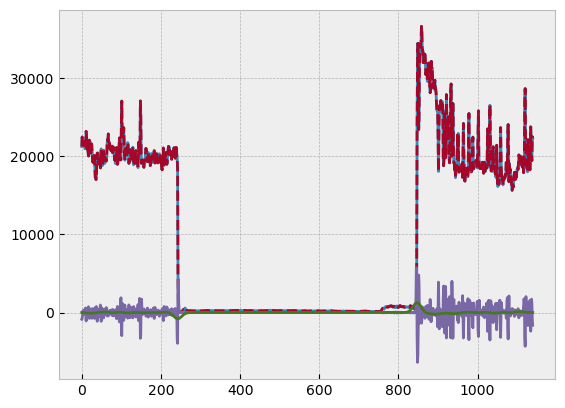

In [27]:
exp=1
rows = exp_excel[exp_excel["Sample"]==exp]

filename_array =rows["AIM_file"].unique()
start_exp = rows["cut_lower"].unique()
end_exp = rows["cut_upper"].unique()
print(filename_array, start_exp, end_exp)
AmmSulCPCFile = CPC_File(os.path.join(CPC_folder_path, filename_array[-1]))
ExpConc = AmmSulCPCFile.extract_experiment_conc(start_sample=start_exp, end_sample=end_exp)
print(type(ExpConc))
plt.plot(ExpConc)
conc_x = np.arange(len(ExpConc))
conc_spl = UnivariateSpline(conc_x, ExpConc)
plt.plot(conc_spl(conc_x), '--')
conc_grad = np.gradient(conc_spl(conc_x))
plt.plot(np.gradient(conc_grad))
print("gradient ok..")
#smoothed_data = np.convolve(ExpConc, np.ones(3), mode="valid")
smoothed_data = gaussian_filter1d(list(ExpConc), sigma=10)
print("smoothed...")
plt.plot(np.gradient(smoothed_data))

Processing experiment 1........
More than 1 peak found, taking the strongest one


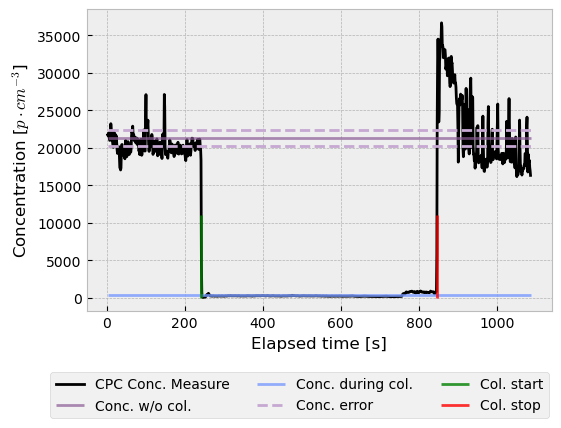

Processing experiment 2........
More than 1 peak found, taking the strongest one


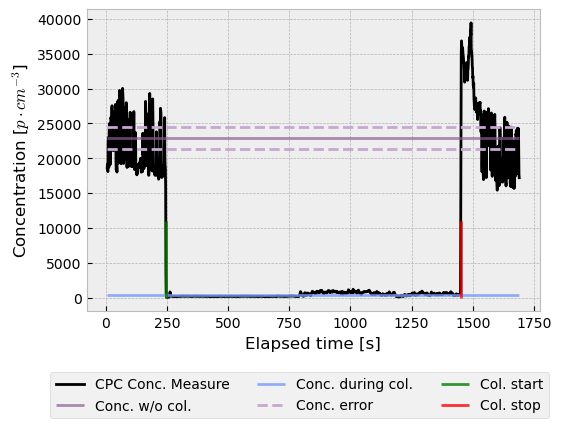

Processing experiment 3........
More than 1 peak found, taking the strongest one


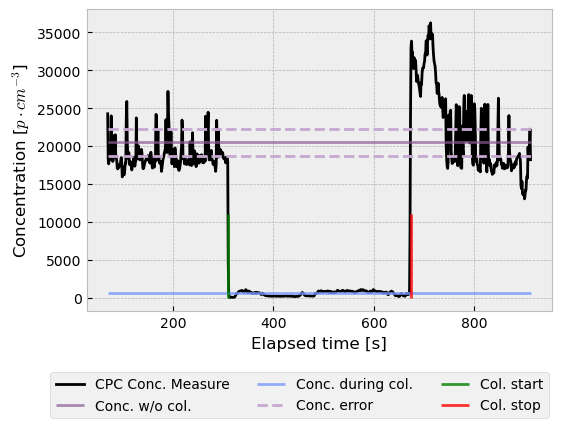

Processing experiment 4........
More than 1 peak found, taking the strongest one
More than 1 peak found, taking the strongest one


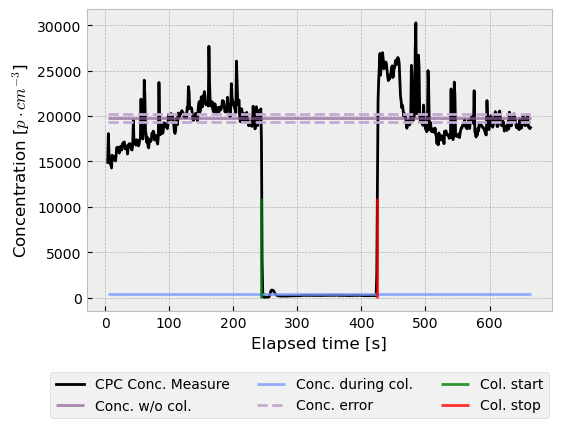

Processing experiment 5........
More than 1 peak found, taking the strongest one


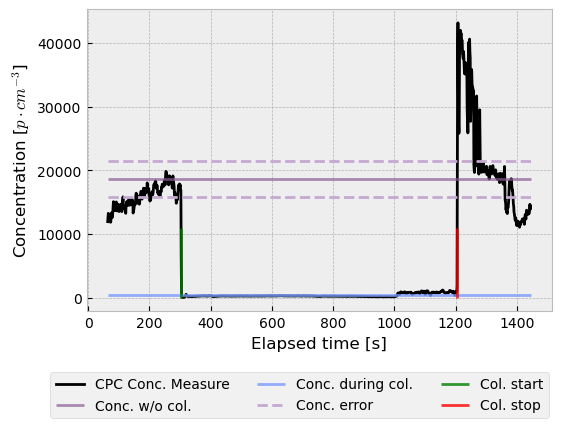

Processing experiment 6........
More than 1 peak found, taking the strongest one
More than 1 peak found, taking the strongest one


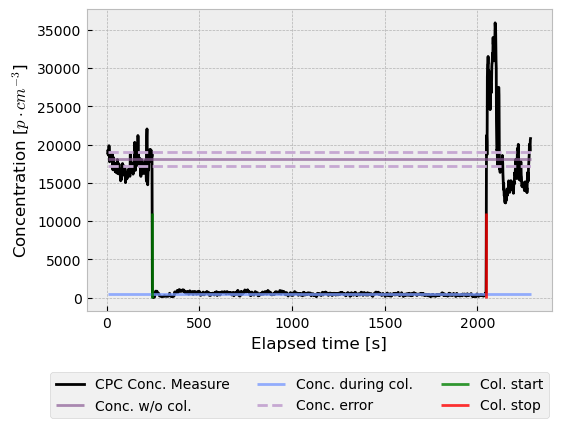

In [41]:
# variable to avoid unecessary repetitive data extraction
old_filename = None

for exp in exp_excel["Sample"].unique():
    print(f"Processing experiment {exp}........")
    rows = exp_excel[exp_excel["Sample"]==exp]

    filename_array =rows["AIM_file"].unique()
    start_exp = rows["cut_lower"].unique()
    end_exp = rows["cut_upper"].unique()

    if len(filename_array)>1:
        print(f"error, filename not unique for exp {exp}")
    else :
        filename = os.path.join(CPC_folder_path,filename_array[0])
    if len(start_exp)>1:
        print(f"error, lower cut number not correct for exp {exp}")
    else:
        start_exp = start_exp[0]
    if len(end_exp)>1:
        print(f"error, upper cut number not correct for exp {exp}")
    else:
        end_exp = end_exp[0]

    if not filename==old_filename:
        AmmSulCPCFile = CPC_File(filename)
        old_filename = filename

    ExpConc = AmmSulCPCFile.extract_experiment_conc(start_sample=start_exp, end_sample=end_exp)
    C_before, C_after, C_base, C_error, C_collection, C_time = AnalyseExpConcTruncated(ExpConc, peak_height=1500, expName = "Exp"+str(exp), output_folder = output_folder)

    results = {'Filename': filename,
               'Experiment Number': exp,
               'Start sample': start_exp,
               'End sample': end_exp,
               'Concentration before': C_before,
               'Concentration after': C_after,
               'Concentration base (mean)': C_base,
               'Concentration error (deviation)': C_error,
               'Concentration collection (mean)': C_collection,
               'Collection time (sec)': C_time,
               'Total collection (part per cm3)': (C_base-C_collection)*C_time,
               'Total collection error (part per cm3)': C_error * C_time}

    # Open a new CSV file for writing
    with open(os.path.join(output_folder,f'Exp{exp}CPCMeasuresResults.csv'), 'w', newline='') as csvfile:
        # Define the field names for the CSV file
        fieldnames = list(results.keys())

        # Create a writer object for the CSV file and write the header row
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()

        # Write the data rows to the CSV file
        writer.writerow(results)

# FTIR extraction and Analysis

Processing experiment 1........
saved fig to ... Data\SubericAcid\OUTPUT\FTIR_comparison_Exp1_deg4.png
saved results to ... Data\SubericAcid\OUTPUT\Exp1FTIRResults.csv and Data\SubericAcid\OUTPUT\Exp1FTIRResults.json
Processing experiment 2........
saved fig to ... Data\SubericAcid\OUTPUT\FTIR_comparison_Exp2_deg4.png
saved results to ... Data\SubericAcid\OUTPUT\Exp2FTIRResults.csv and Data\SubericAcid\OUTPUT\Exp2FTIRResults.json
Processing experiment 3........
saved fig to ... Data\SubericAcid\OUTPUT\FTIR_comparison_Exp3_deg4.png
saved results to ... Data\SubericAcid\OUTPUT\Exp3FTIRResults.csv and Data\SubericAcid\OUTPUT\Exp3FTIRResults.json
Processing experiment 4........
saved fig to ... Data\SubericAcid\OUTPUT\FTIR_comparison_Exp4_deg4.png
saved results to ... Data\SubericAcid\OUTPUT\Exp4FTIRResults.csv and Data\SubericAcid\OUTPUT\Exp4FTIRResults.json
Processing experiment 5........
saved fig to ... Data\SubericAcid\OUTPUT\FTIR_comparison_Exp5_deg4.png
saved results to ... Data\Sub

True

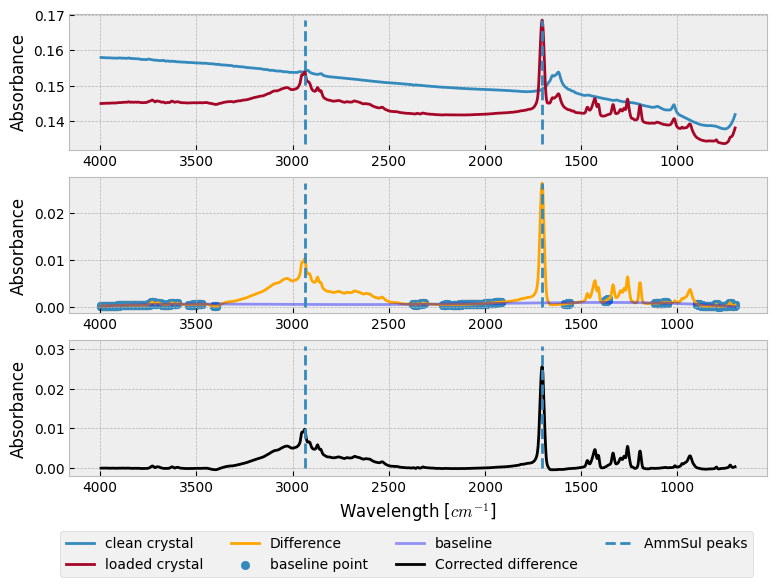

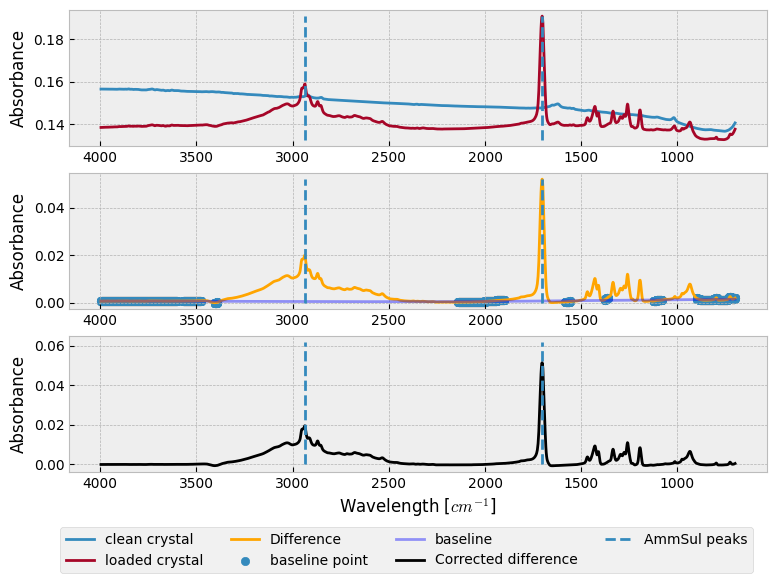

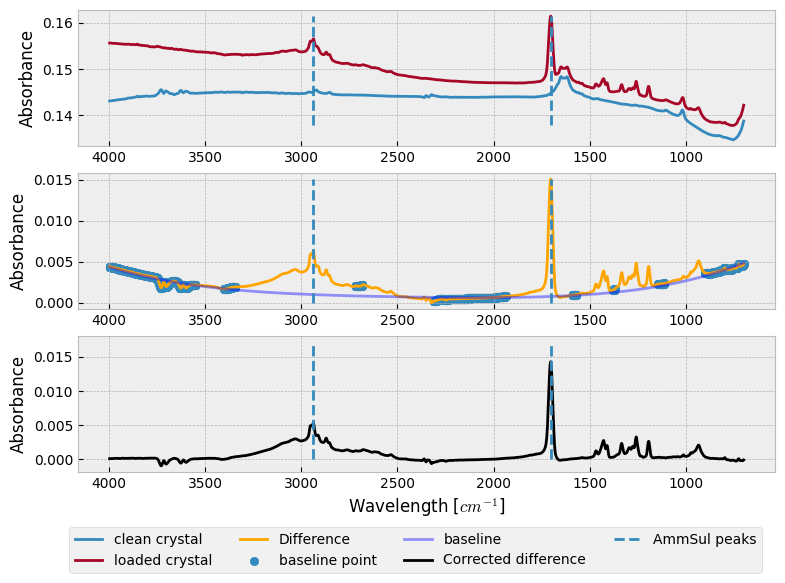

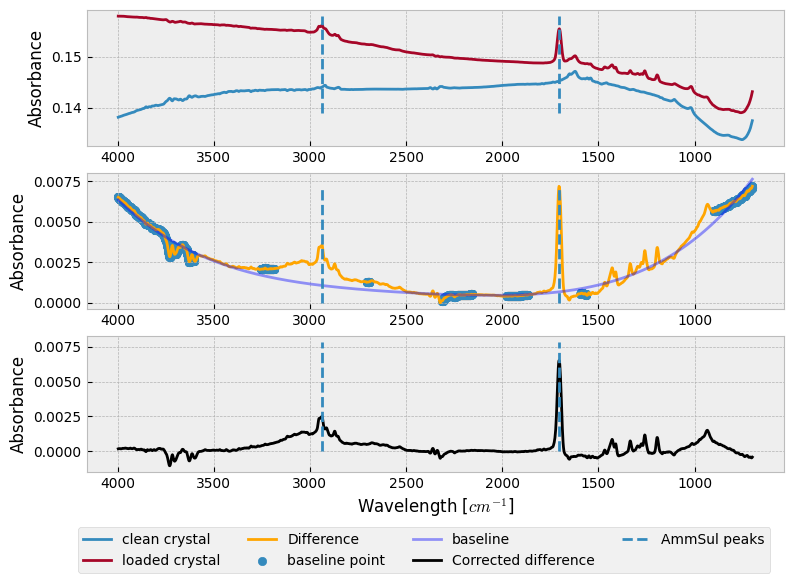

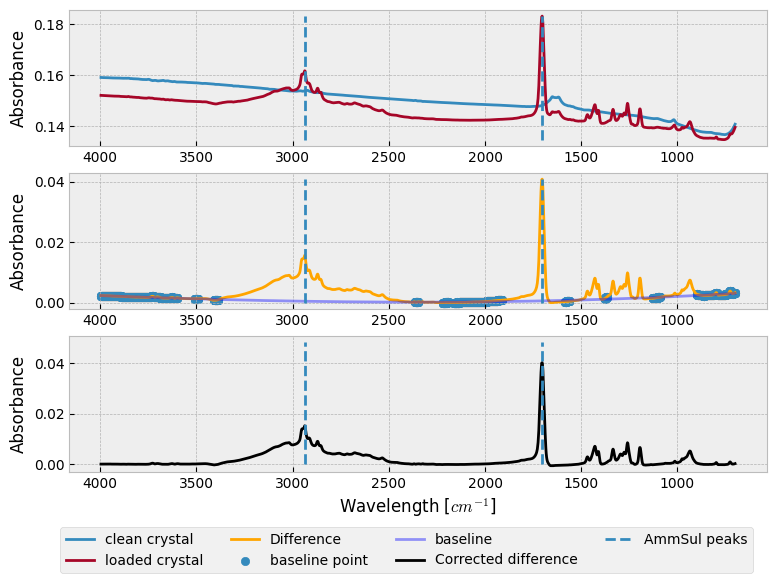

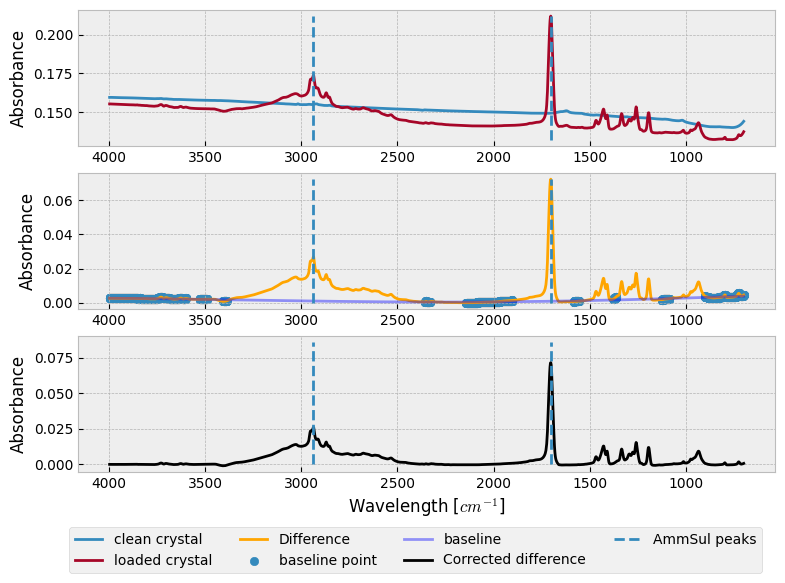

In [22]:
All_Absorbance_Analysis(excel_file=exp_excel_path, data_path=FTIR_folder_path, output_folder=output_folder, peak_locations=[1700, 2900], peak_height=0.001, distance_between_peaks=50)

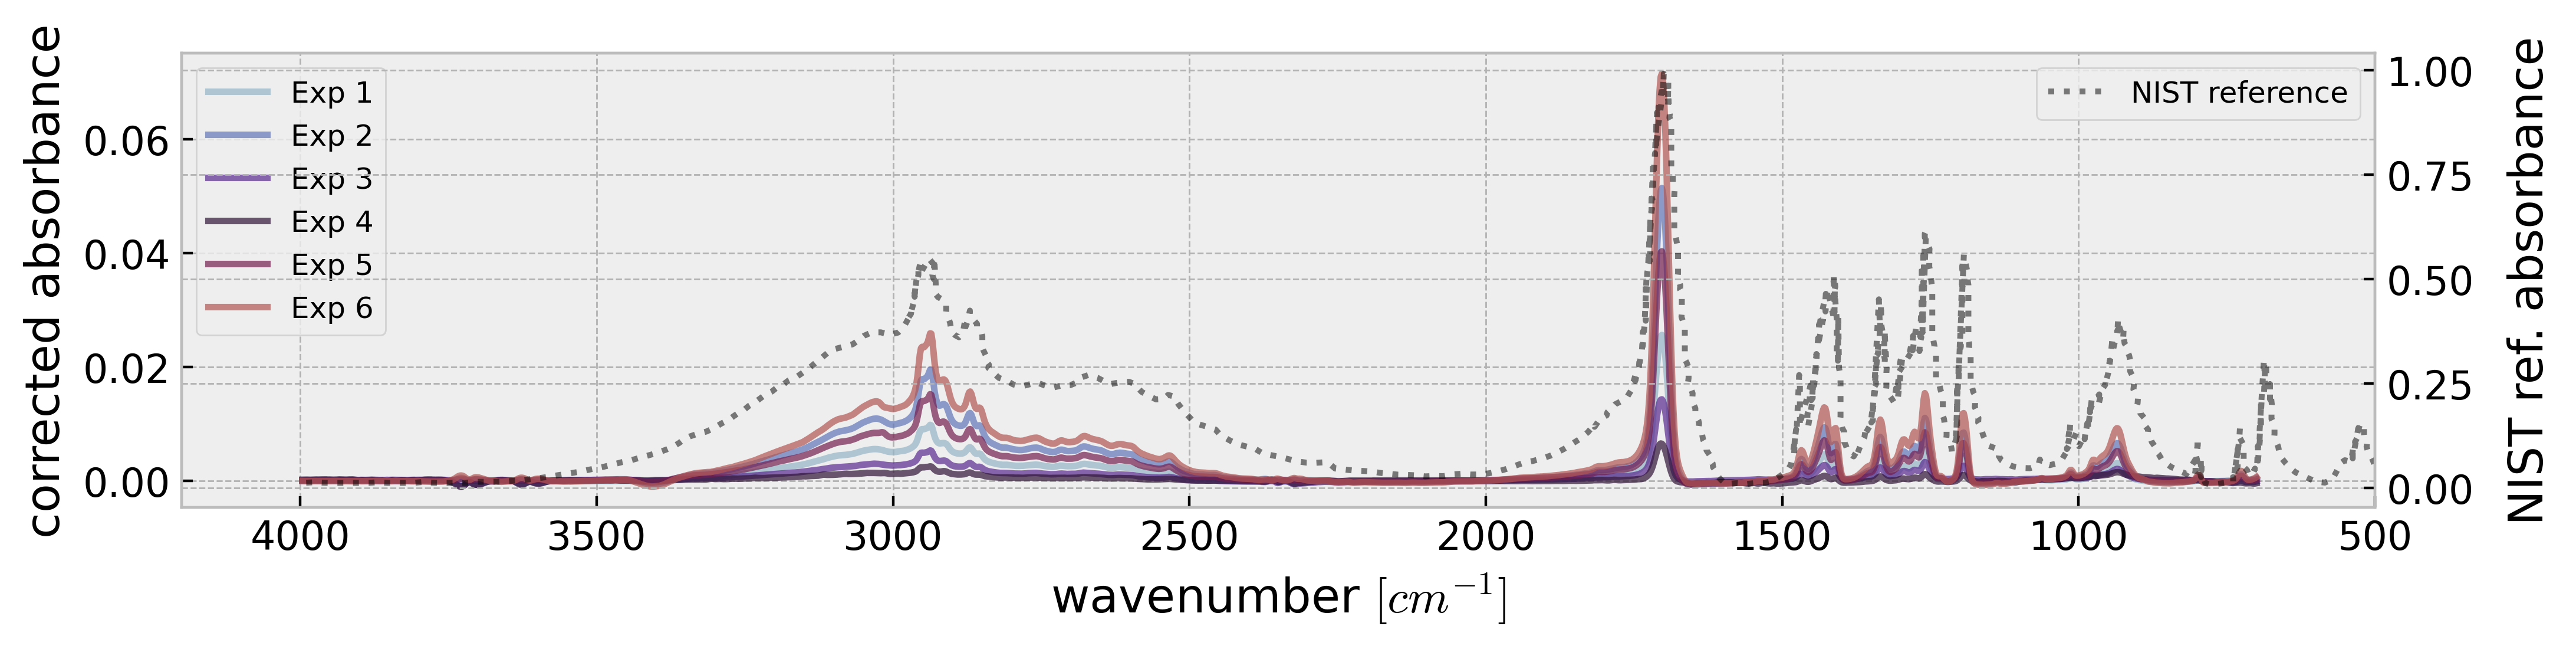

True

In [35]:
nist_file = os.path.join("Data","NIST", "suberic_acid.csv")
ShoowAllCorrectedAbsorbances(excel_datafrane=exp_excel, output_folder_path=output_folder, nist_filepath=nist_file)

# Computation of the measure related to absorbance

In [14]:
# TO run to update the computed value
data_dict = Particles2Absorbances(exp_excel, data_path=data_path, output_folder=output_folder)

Relative patch area ratio:0.44540238637651886 and diameter 16.95157230449951
Relative patch area ratio:0.4408084943669758 and diameter 16.863926239929956
Relative patch area ratio:0.5242786809387193 and diameter 18.391401082963313
Relative patch area ratio:0.8833501921814747 and diameter 23.87262469834015
Relative patch area ratio:0.48027617362847475 and diameter 17.602697980086653
Relative patch area ratio:0.4583824764049741 and diameter 17.196803147022212


In [8]:
# TO run to get the values
aerial_density_json_filepath = os.path.join(output_folder, "ParticlesAndAbsorbances.json")
if not os.path.exists(aerial_density_json_filepath):
    raise NotADirectoryError(f"json file not valid directory: {aerial_density_json_filepath}")

with open(aerial_density_json_filepath) as json_file:
    data_dict = json.load(json_file)

Masses = np.array(data_dict["Masses"])
Masses_error = np.array(data_dict["Masses_error"])
N_as = np.array(data_dict["N_as"])
N_as_error = np.array(data_dict["N_as_error"])
Exps = np.array(data_dict["Exps"])

peaks_wv = np.loadtxt(os.path.join(output_folder,"PeaksWavelengthsArray.csv"), delimiter=',')
peaks_abs = np.loadtxt(os.path.join(output_folder, "PeaksAbsorbanceArray.csv"), delimiter=',')

# Full linear regression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Input data with errors
x_data = N_as  # Estimated thickness with errors
y_data1 = peaks_abs[:,0] # Absorbance at 1st wavelength
peak_1 = np.mean(peaks_wv[:,0])
y_data2 =  peaks_abs[:,1] # Absorbance at 2nd wavelength
peak_2 = np.mean(peaks_wv[:,1])
x_error = N_as_error # Error in x-axis measurements

#reference for CO peak
Molar_Absorptivity1 = 13.7 * 1e3 # a.u per mol, @aCO peak
Molar_Absorptivity2 = 41.3 * 1e3 # a.u per mol, @aOH peak

Filter_Area = np.pi*(4.7/2)**2
MolarMass = exp_excel["M"].unique()[-1]
rho =  exp_excel["rho"].unique()[-1]

Attenuation_Factor1 = (Molar_Absorptivity1*rho)/(MolarMass)
Attenuation_Factor2 = (Molar_Absorptivity2*rho)/(MolarMass)

x_ref = np.linspace(np.min(x_data), np.max(x_data),100)

alpha_ref_y1 = x_ref*Attenuation_Factor1
alpha_ref_y2 = x_ref*Attenuation_Factor2
print(f'Attenuation_Factor1 = {Attenuation_Factor1}')
print(f'Attenuation_Factor2 = {Attenuation_Factor2}')


# Linear regression for y_data1
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(np.append(x_data,0), np.append(y_data1,0))
y_fit1 = slope1 * x_ref + intercept1
y1_error_min = y_fit1 - std_err1 * x_ref
y1_error_max = y_fit1 + std_err1 * x_ref

# Linear regression for y_data2
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(np.append(x_data,0), np.append(y_data2,0))
y_fit2 = slope2 * x_ref + intercept2
y2_error_min = y_fit2 - std_err2 * x_ref
y2_error_max = y_fit2 + std_err2 * x_ref



Attenuation_Factor1 = 100.03673938002298
Attenuation_Factor2 = 301.5706084959816


301.5706084959816


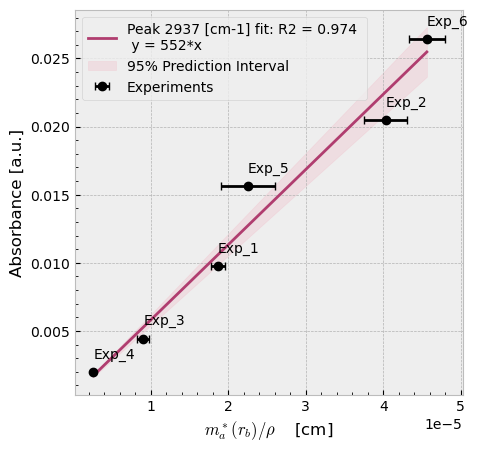

 y2 = (552±39.98563062575833)*x + 0.0002814591038375197
0.9824999481671489 0.987152298990885


In [10]:
plt.figure(figsize=(5,5))
#reference for O-H peak
## OH stretch carboxylic acid
Molar_Absorptivity = 41.3 * 1e3 # a.u per mol, @aOH peak
Filter_Area = np.pi*(4.7/2)**2
MolarMass = exp_excel["M"].unique()[-1]
rho =  exp_excel["rho"].unique()[-1]
Attenuation_Factor = (Molar_Absorptivity*rho)/(MolarMass)
print(Attenuation_Factor)
x_ref = np.linspace(np.min(x_data), np.max(x_data),100)
alpha_ref_y = x_ref*Attenuation_Factor


plt.errorbar(x_data, y_data2, xerr=x_error,capsize=3, fmt='o',color = 'k', label='Experiments')
for i,exp in enumerate(Exps):
    plt.annotate('Exp_'+str(exp),[1*x_data[i],0.001+y_data2[i]], xycoords = 'data')
plt.plot(x_ref, y_fit2,label=f'Peak {peak_2:.0f} [cm-1] fit: R2 = {r_value2**2:.3f} \n y = {slope2:.0f}*x', color = '#B03D6F')

#plt.plot(x_ref, y2_error_min, dashes= [6,6], alpha=0.5, color = '#CBA8FF', label = '95% Prediction Interval')
#plt.plot(x_ref, y2_error_max, dashes = [6, 6], alpha=0.5, color = '#CBA8FF')
plt.fill_between(x_ref, y2_error_min, y2_error_max, color = '#F0B7C4', alpha=0.3, label = '95% Prediction Interval')
#plt.plot(x_ref, alpha_ref_y, '-.', color='black', alpha=0.5, label=r"$\alpha$ ref")

plt.minorticks_on()
plt.grid(True, which="major")
#plt.grid(True, which='major', linestyle = '-', )
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.xlabel(r'$m_a^*(r_b)/\rho \quad$ [cm]')
plt.ylabel('Absorbance [a.u.]')
plt.legend()
plt.savefig(os.path.join(output_folder, f"LinReg_peak{peak_2:.0f}.png"), dpi=200, bbox_inches='tight')
plt.show()
print(f" y2 = ({slope2:.0f}±{std_err2})*x + {intercept2}")
print(r_value1, r_value2)

Attenuation_Factor1 = 100.03673938002298
Attenuation_Factor2 = 301.5706084959816


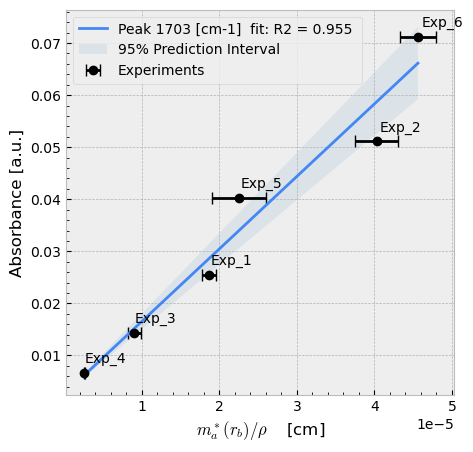

y1 = 1391.9331397568176+/-151.90913030189682*x + 0.002639156671119587


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Input data with errors
x_data = N_as  # Estimated thickness with errors
y_data1 = peaks_abs[:,0] # Absorbance at 1st wavelength
peak_1 = np.mean(peaks_wv[:,0])
y_data2 =  peaks_abs[:,1] # Absorbance at 2nd wavelength
peak_2 = np.mean(peaks_wv[:,1])
x_error = N_as_error # Error in x-axis measurements


#reference for CO peak
Molar_Absorptivity1 = 13.7 * 1e3 # a.u per mol, @aC0 peak
Molar_Absorptivity2 = 41.3 * 1e3 # a.u per mol, @aCOH peak

Filter_Area = np.pi*(4.7/2)**2
MolarMass = exp_excel["M"].unique()[-1]
rho =  exp_excel["rho"].unique()[-1]

Attenuation_Factor1 = (Molar_Absorptivity1*rho)/(MolarMass)
Attenuation_Factor2 = (Molar_Absorptivity2*rho)/(MolarMass)

x_ref = np.linspace(np.min(x_data), np.max(x_data),100)

alpha_ref_y1 = x_ref*Attenuation_Factor1
alpha_ref_y2 = x_ref*Attenuation_Factor2
print(f'Attenuation_Factor1 = {Attenuation_Factor1}')
print(f'Attenuation_Factor2 = {Attenuation_Factor2}')


# Linear regression for y_data1
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(x_data, y_data1)
y_fit1 = slope1 * x_ref + intercept1
y1_error_min = y_fit1 - std_err1 * x_ref
y1_error_max = y_fit1 + std_err1 * x_ref

# Linear regression for y_data2
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(x_data, y_data2)
y_fit2 = slope2 * x_ref + intercept2
y2_error_min = y_fit2 - std_err2 * x_ref
y2_error_max = y_fit2 + std_err2 * x_ref


# Plot the results for CO peak
plt.figure(figsize=(5,5))
plt.errorbar(x_data, y_data1, xerr=x_error, fmt='o',capsize=4, color = 'k', label='Experiments')
for i,exp in enumerate(Exps):
    plt.annotate('Exp_'+str(exp),[1.01*x_data[i],0.002 + y_data1[i]], xycoords = 'data')
plt.plot(x_ref, y_fit1, label=f'Peak {peak_1:.0f} [cm-1]  fit: R2 = {r_value1**2:.3f} ',color = '#4287f5')
plt.fill_between(x_ref, y_fit1 - std_err1 * x_ref, y_fit1 + std_err1 * x_ref, alpha=0.1,label = '95% Prediction Interval')
#plt.plot(x_ref, alpha_ref_y1, '-.',color = '#4287f5' , alpha=0.5, label=r"$\alpha$"+f" ref CO (Reggente et al., 2018)")
plt.minorticks_on()
plt.grid(True, which="major")
#plt.grid(True, which='major', linestyle = '-', )
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))


plt.xlabel(r'$m_a^*(r_b)/\rho \quad$ [cm]')
plt.ylabel('Absorbance [a.u.]')
plt.legend(loc='upper left')
plt.savefig(os.path.join(output_folder, f"LinReg_peak{peak_1:.0f}.png"), dpi=200, bbox_inches='tight')
plt.show()

print(f"y1 = {slope1}+/-{std_err1}*x + {intercept1}")

Peak .... 0
peak: 1703 cm-1: Y = 1428.17*x + 1.66e-03
MeasAttenuationCoeff = 195.6 +/- 16.4 [a.u. cm2 micromol]
Peak .... 1
peak: 2937 cm-1: Y = 524.93*x + 7.77e-04
MeasAttenuationCoeff = 71.9 +/- 5.5 [a.u. cm2 micromol]


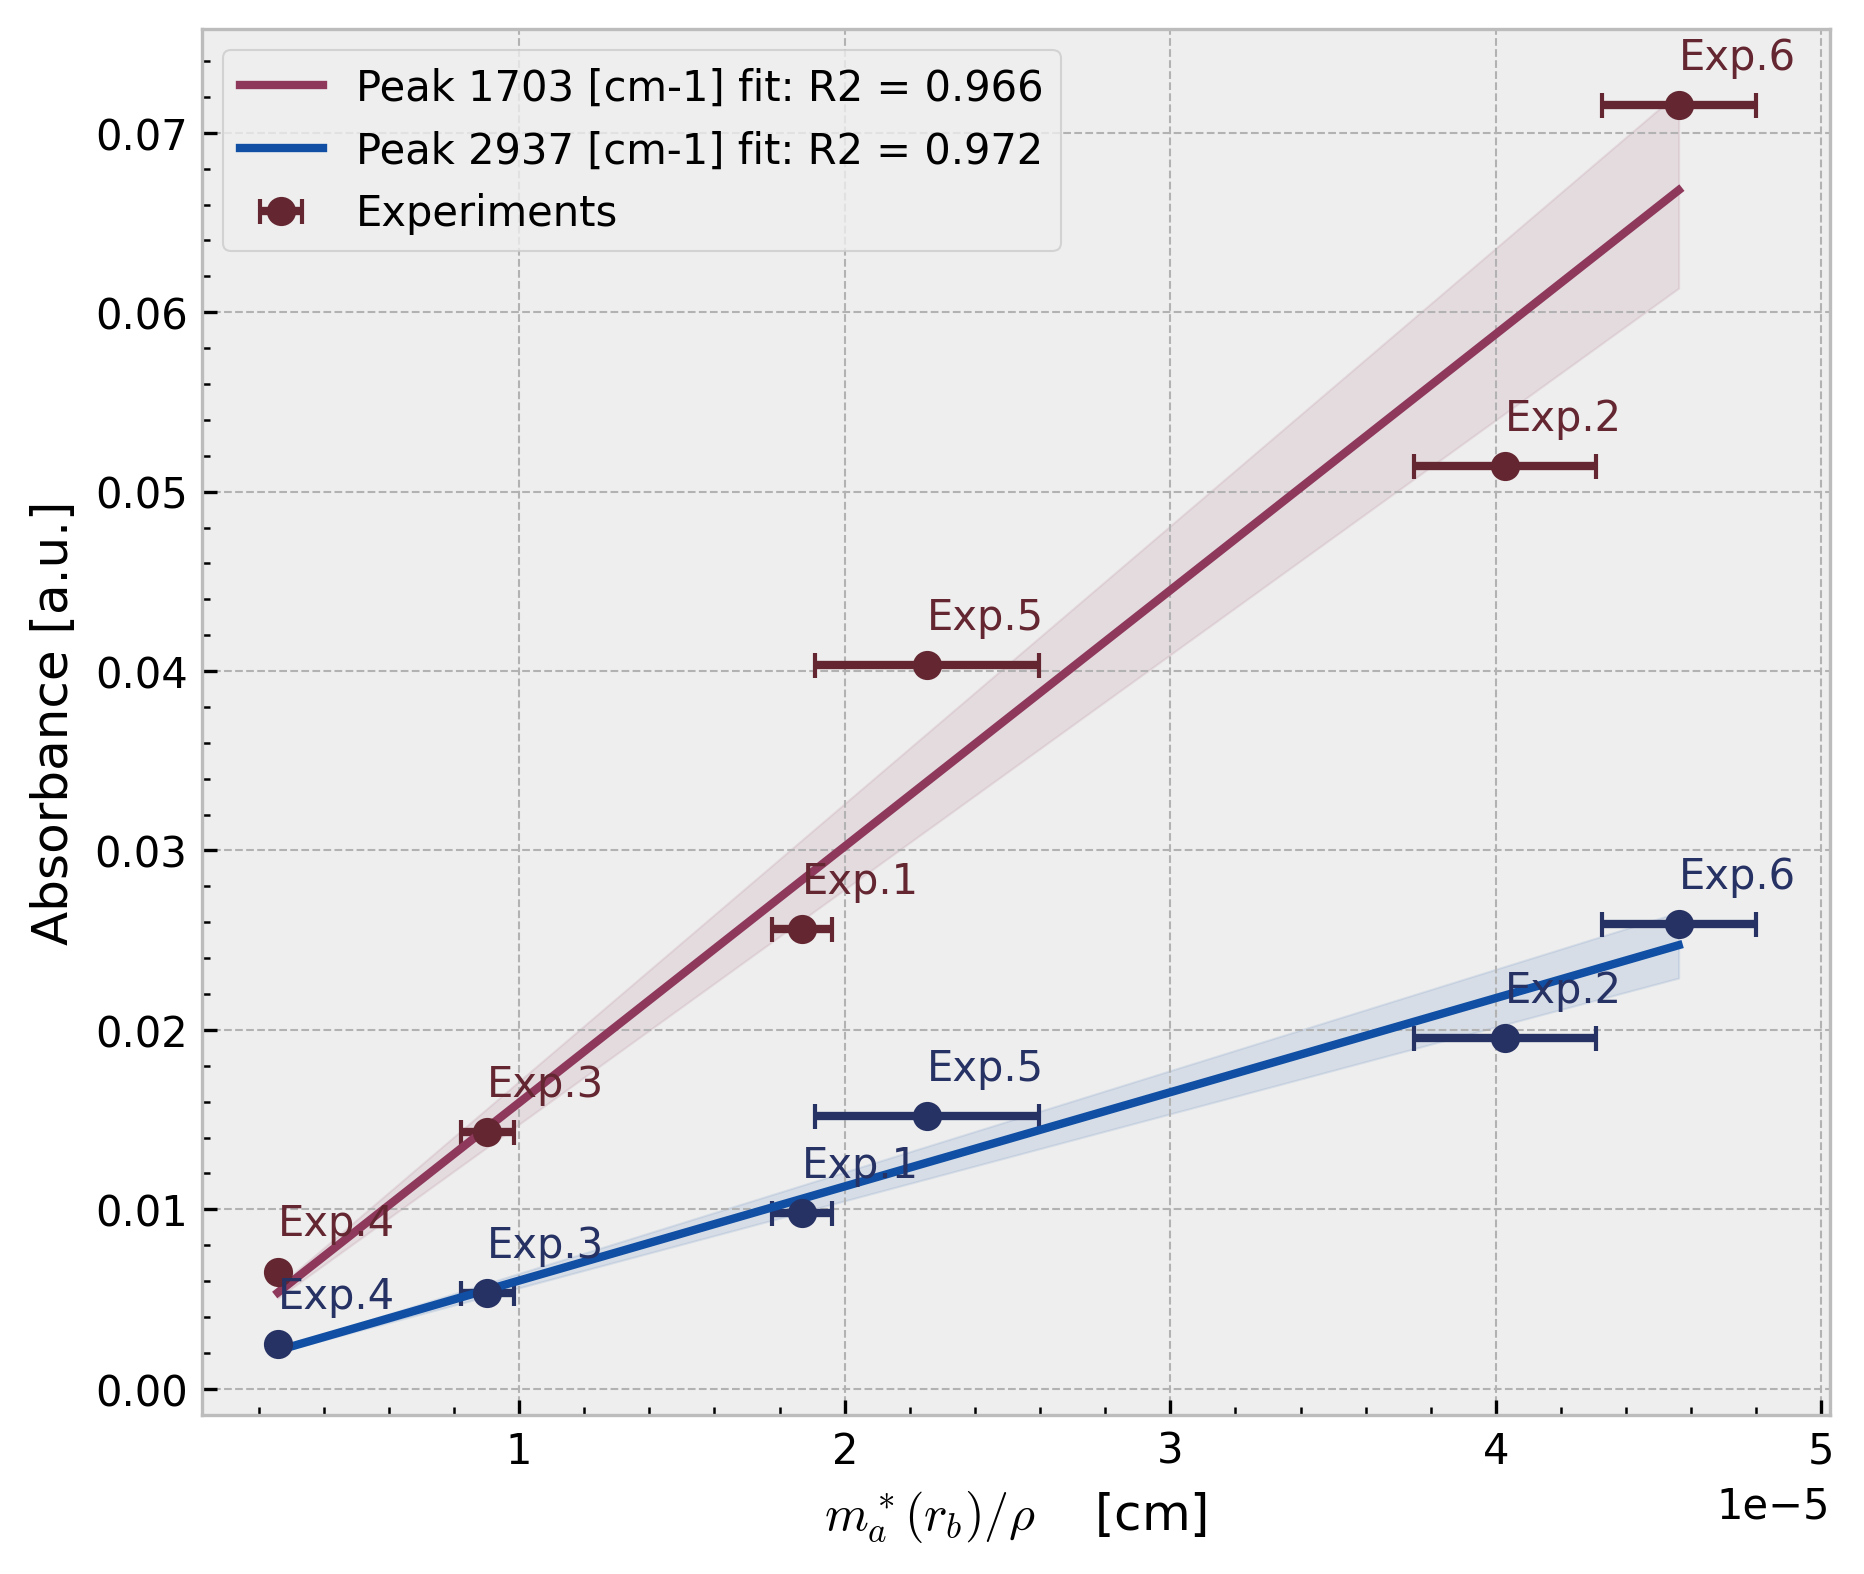

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Input data with errors
x_data =N_as# Estimated thickness with errors
x_ref = np.linspace(np.min(x_data), np.max(x_data), 100) # some more values to fit regression
x_error = N_as_error # Error in x-axis measurements

colors_list  = ['#8e395c', '#104fa4', '#5c8e39']
colors_errorbars = ["#642631", "#263164", "#316426"]


# Linear regression for y_data i 
fig, ax = plt.subplots(1,1,figsize=(7,6), dpi = 300)
for peak_num in range(peaks_wv.shape[1]):
    print(f"Peak .... {peak_num}")
    peak_i = np.mean(peaks_wv[:,peak_num])
    y_data = peaks_abs[:,peak_num]

    slope, intercept, r_value, p_value, std_err = linregress(np.append(x_data,0), np.append(y_data,0))
    print(f"peak: {peak_i:.0f} cm-1: Y = {slope:.2f}*x + {intercept:.2e}")
    y_fit = slope * x_ref + intercept
    y_error_min = y_fit - std_err * x_ref
    y_error_max = y_fit + std_err * x_ref

    # Experiments
    if peak_num == 0:
        plt.errorbar(x_data, y_data, xerr=x_error,capsize=3, fmt='o', label='Experiments', color = colors_errorbars[peak_num])
    else : 
        plt.errorbar(x_data, y_data, xerr=x_error,capsize=3, fmt='o', color = colors_errorbars[peak_num])
    # Annotation
    if peak_num != 2:
        for i,exp in enumerate(Exps):
            plt.annotate('Exp.'+str(exp),[1*x_data[i],0.002 + y_data[i]], xycoords = 'data', color = colors_errorbars[peak_num])
    # Linear regression
    plt.plot(x_ref, y_fit,label=f'Peak {peak_i:.0f} [cm-1] fit: R2 = {r_value**2:.3f}', color = colors_list[peak_num] )
    #plt.plot(x_ref, y2_error_min, dashes= [6,6], alpha=0.5, color = '#CBA8FF', label = '95% Prediction Interval')
    #plt.plot(x_ref, y2_error_max, dashes = [6, 6], alpha=0.5, color = '#CBA8FF')
    plt.fill_between(x_ref, y_fit - std_err * x_ref, y_fit + std_err * x_ref, color = colors_list[peak_num], alpha=0.1)


    MolarMass = exp_excel["M"].unique()[-1]
    rho = exp_excel["rho"].unique()[-1]

    MeasAttenuationCoeff_1 = slope * MolarMass / rho / 1000
    MeasStd_1 = std_err * MolarMass / rho / 1000
    #print(intercept)
    print(f"MeasAttenuationCoeff = {MeasAttenuationCoeff_1:.1f} +/- {MeasStd_1:.1f} [a.u. cm2 micromol]")
    
plt.minorticks_on()
plt.grid(True, which="major")
#plt.grid(True, which='major', linestyle = '-', )
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

plt.xlabel(r'$m_a^*(r_b)/\rho \quad$ [cm]')
plt.ylabel('Absorbance [a.u.]')
plt.legend()

plt.savefig(os.path.join(output_folder,f"LinReg_peaks_all.png"), dpi=200, bbox_inches='tight')
plt.show()

# Peaks median and deviation

In [71]:
m_peak1, std_peak1= np.median(peaks_wv[:,0]), np.std(peaks_wv[:,0])
m_peak2, std_peak2 = np.median(peaks_wv[:,1]), np.std(peaks_wv[:,1])
print(m_peak1, std_peak1, std_peak1/m_peak1 * 100)
print(m_peak2, std_peak2, std_peak2/m_peak2 * 100)
peaks_wv

1703.05547 0.7187915049271895 0.04220599490674191
2937.43317 0.0 0.0


array([[1703.05547, 2937.43317],
       [1703.05547, 2937.43317],
       [1703.05547, 2937.43317],
       [1704.98419, 2937.43317],
       [1703.05547, 2937.43317],
       [1703.05547, 2937.43317]])

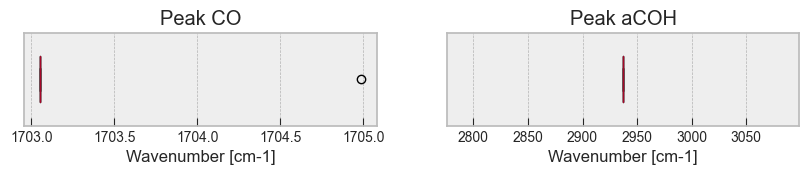

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(10,1.2))

axs[0].boxplot(peaks_wv[:,0],vert = False, widths=0.5)
axs[0].set_title(f"Peak CO")
axs[0].set_xlabel("Wavenumber [cm-1]")
axs[0].set_yticks([])
axs[1].boxplot(peaks_wv[:,1], vert = False, widths=0.5)
axs[1].set_title(f"Peak aCOH")
axs[1].set_xlabel(f"Wavenumber [cm-1]")
axs[1].set_yticks([])

plt.savefig(os.path.join(output_folder, f"Boxplot_SubAc.png"), dpi=200, bbox_inches='tight')